In [37]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train.shape

170508288/170498071 [==============================] - 4s 0us/step


(50000, 32, 32, 3)

In [3]:
x_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)


In [7]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [12]:
def plot_sample(x, y, index):
  plt.figure(figsize = (15,4))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])


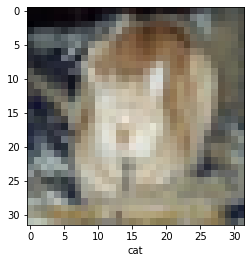

In [14]:
plot_sample(x_train, y_train, 33)

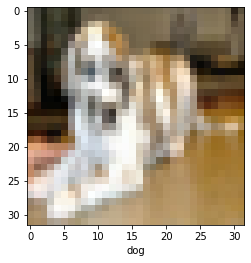

In [17]:
plot_sample(x_train, y_train, 1111)

In [18]:
x_train = x_train/255.0
x_test = x_test/255.0

In [20]:
cnn = models.Sequential([layers.Conv2D(filters= 32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
                         layers.MaxPooling2D((2, 2)),
                         layers.Conv2D(filters= 64, kernel_size=(3,3 ), activation='relu'),
                         layers.MaxPooling2D((2,2)),
                         layers.Flatten(),
                         layers.Dense(64, activation='relu'),
                         layers.Dense(126, activation='relu'),
                         layers.Dense(10, activation='softmax')
                         ])

In [21]:
cnn.compile(optimizer = 'adamax',
            loss= 'sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [22]:
cnn.fit(x_train, y_train, epochs = 20)

Epoch 1/20
1563/1563 [==============================] - 60s 38ms/step - loss: 1.6593 - accuracy: 0.3922
Epoch 2/20
1563/1563 [==============================] - 59s 38ms/step - loss: 1.3272 - accuracy: 0.5241
Epoch 3/20
1563/1563 [==============================] - 59s 38ms/step - loss: 1.1849 - accuracy: 0.5783
Epoch 4/20
1563/1563 [==============================] - 59s 37ms/step - loss: 1.0796 - accuracy: 0.6202
Epoch 5/20
1563/1563 [==============================] - 59s 38ms/step - loss: 0.9973 - accuracy: 0.6513
Epoch 6/20
1563/1563 [==============================] - 59s 38ms/step - loss: 0.9349 - accuracy: 0.6738
Epoch 7/20
1563/1563 [==============================] - 58s 37ms/step - loss: 0.8802 - accuracy: 0.6929
Epoch 8/20
1563/1563 [==============================] - 58s 37ms/step - loss: 0.8321 - accuracy: 0.7099
Epoch 9/20
1563/1563 [==============================] - 58s 37ms/step - loss: 0.7911 - accuracy: 0.7259
Epoch 10/20
1563/1563 [==============================] - 59s 37m

In [23]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.9930 - accuracy: 0.7033


[0.9929676651954651, 0.7032999992370605]

In [24]:
y_pred = cnn.predict(x_test)
y_pred[:5]

array([[1.06092740e-03, 3.26635345e-05, 8.20938032e-03, 9.72059250e-01,
        1.05209951e-03, 1.51241561e-02, 1.54598267e-03, 7.57635571e-05,
        4.05756524e-04, 4.33979934e-04],
       [1.69848069e-03, 5.88175021e-02, 6.55005579e-08, 1.93596770e-06,
        7.04326952e-09, 1.23654672e-07, 7.64399655e-09, 5.85453463e-08,
        9.38815773e-01, 6.66000065e-04],
       [1.08644627e-01, 2.83663809e-01, 1.28812564e-04, 1.63227634e-03,
        3.04944551e-04, 5.07903169e-04, 1.21879384e-04, 9.45022388e-04,
        2.04844207e-01, 3.99206430e-01],
       [9.64400709e-01, 2.11739610e-03, 2.62494618e-03, 3.46267298e-05,
        4.91359551e-03, 2.62568346e-06, 1.20979375e-05, 6.76247873e-05,
        2.50710193e-02, 7.55342015e-04],
       [6.47808829e-09, 6.49679180e-07, 1.99525297e-04, 4.32443433e-03,
        1.85586396e-03, 3.24680586e-05, 9.93584216e-01, 8.19469159e-10,
        2.65739709e-06, 1.92233802e-08]], dtype=float32)

In [25]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 9, 0, 6]

In [26]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

TypeError: ignored

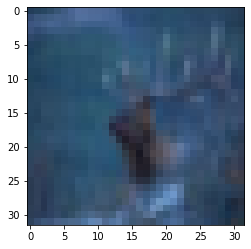

In [35]:
plot_sample(x_test, y_test, 22)

In [36]:
classes[y_classes[22]]

'deer'